In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import math
import itertools


In [2]:
# Set the style of seaborn plots
sns.set_theme(style='darkgrid')
mpl.rcParams['hatch.linewidth'] = 0.5

# Define full features, policy names, titles
featnames = {'lexdiv': 'Lexical Diversity',
            'sentclass': 'Sentiment',
            'sim': 'Topical Similarity',
            'smog': 'Readability'}
polnames = {'chron': 'Chronological',
            'least-neg-abs': 'Rev. Downvotes',
            'neg-abs': 'Downvotes',
            'pos-abs': 'Upvotes',
            'pos-rel': 'Relative Votes',
            'rev-chron': 'Rev. Chronological',
            'pred-nb': 'Pred. Upvotes (NBR)',
            'pred-rf': 'Pred. Upvotes (RF)',            
            'pin-pred-lr': 'Pred. Editors\' Picks (LR)',
            'pin-pred-rf': 'Pred. Editors\' Picks (RF)',
            'random': 'Random',
            'policy_chron': 'Chronological',
            'policy_least-neg-abs': 'Rev. Downvotes',
            'policy_neg-abs': 'Downvotes',
            'policy_pos-abs': 'Upvotes',
            'policy_pos-rel': 'Relative Votes',
            'policy_rev-chron': 'Rev. Chronological',
            'policy_random': 'Random',
            'policy_pin-pred-lr': 'Pred. Editors\' Picks (LR)',
            'policy_pin-pred-rf': 'Pred. Editors\' Picks (RF)',
            'policy_pred-nb': 'Pred. Upvotes (NBR)',
            'policy_pred-rf': 'Pred. Upvotes (RF)',
            'replies_rh': 'Replies Hidden',
            'replies_rt': 'Reply Trees Shown',
            'replies_rl': 'Replies Loose',
            'replies hidden': 'Replies Hidden',
            'reply trees': 'Reply Trees Shown',
            'replies loose': 'Replies Loose',
            'pinned': 'Editors\' Picks Pinned',
            'not_pinned': 'Editors\' Picks Not Pinned'}
titles = {'10': 'First 10 Comments','N': 'Full Comment Discussion'}
repl = {'rh': 'Hidden',
        'rt': 'Trees',
        'rl': 'Loose'}


# Function to parse policy elements from policy name
def policynameparse(x):
    if x.startswith('policy_'):
        x = x[7:]

    spl = x.split('_')
    policy = polnames[spl[0]]
    replies = repl[spl[-1]]
    pinned = 'Pinned' if 'pinned' in x else 'Not Pinned'

    return policy, replies, pinned

# Function to assign significance labels based on p-values
def txt(n):
    if n < .001:
        return '***'
    elif n < .01:
        return '**'
    elif n < .05:
        return '*'
    else:
        return '-'
    
# define order and position dictionaries
polorder = ['Upvotes', 'Relative Votes', 'Downvotes', 'Rev. Downvotes', 
       'Chronological', 'Rev. Chronological', 'Pred. Editors\' Picks (LR)',
       'Pred. Editors\' Picks (RF)', 'Pred. Upvotes (NBR)', 'Pred. Upvotes (RF)',
       'Replies Hidden', 'Reply Trees Shown', 'Editors\' Picks Pinned']
prodorder = list(itertools.product(polorder[:-3], polorder[-3:]))

featorder = ['Lexical Diversity', 'Sentiment', 'Topical Similarity', 'Readability']

pos_dict1 = {x: n for n, x in enumerate(polorder)}
pos_dict2 = {'Lexical Diversity': 0,
            'Sentiment': 1,
            'Topical Similarity': 2,
            'Readability': 3}
pos_dict3 = {x: n for n, x in enumerate(polorder[-3:])}

# Dictionary to map feature names to colors
color_dict = dict(zip(['Lexical Diversity', 'Sentiment', 'Topical Similarity',
                      'Readability'], [sns.color_palette("colorblind")[:4]]))

pal = sns.color_palette(["#69ef7b", "#284e37", "#aad0aa", "#44a42f", "#10eddc",
                         "#19477d", "#c697f4", "#762aac", "#40b8e1", "#8c2e63",
                         "#f764de", "#3f16f9", "#c0e15c"])

In [3]:
# Load data from regression analysis (R)

df_total = pd.read_csv('data/betareg.csv', index_col=0)
df_total['feature'] = df_total['feature'].str.replace('.', '-').apply(lambda x: polnames.get(x, x))
df_total['variable'] = df_total['variable'].map(featnames)

pdictr = {}
for n in ['10', 'N']:
    pdictr[n] = {}
    pdictr[n]['coef'] = df_total[df_total['n']==n][['feature', 'variable', 'Estimate']
                            ].rename(columns={'feature':'index', 'Estimate': 'value'})
    pdictr[n]['coef']['valuet'] = (np.exp(pdictr[n]['coef']['value']) - 1)/(np.exp(pdictr[n]['coef']['value']) + 1)

    pdictr[n]['pv'] = df_total[df_total['n']==n][['feature', 'variable', 'Pr(>|z|)']
                        ].rename(columns={'feature':'index', 'Pr(>|z|)': 'value'})
    pdictr[n]['pv']['valuet'] = pdictr[n]['pv']['value'].apply(txt)

/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

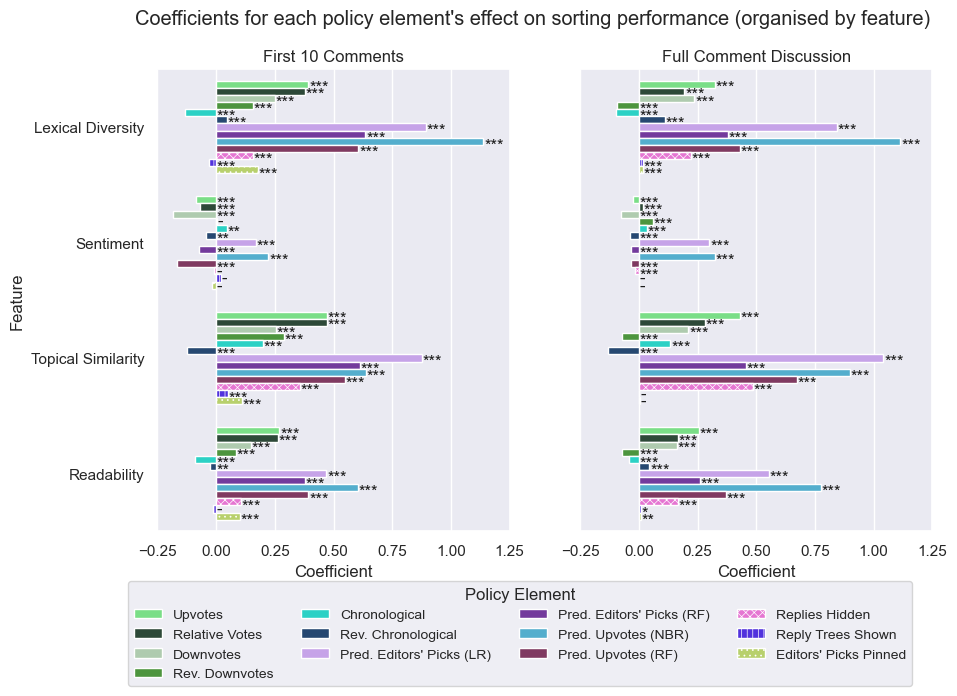

In [4]:
# Plot coefficients by feature

fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
shift = 0.1
off = 0.003
for n, (ncomments, pdictn) in enumerate(pdictr.items()):
    ax = axs[n]
    pdf = pdictn['coef']
    pdf = pdf[(pdf['index']!='(Intercept)')&(~pdf['index'].str.contains(':'))]
    pdf.set_index('index').loc[polorder].reset_index()
    pvdf = pdictn['pv']
    pvdf = pvdf[(pvdf['index']!='(Intercept)')&(~pvdf['index'].str.contains(':'))]
    pvdf.set_index('index').loc[polorder].reset_index()
    sns.barplot(data=pdf, x='value', y='variable', hue='index',
                palette=pal, hue_order=polorder,
                ax=axs[n])
    ax.set_xlabel('Coefficient')
    ax.set_xlim(-0.25, 1.25)
    ax.set_title(titles[ncomments])

    colors = [handle.patches[0].get_fc()
                for handle in ax.get_legend_handles_labels()[0]]

    # change hatching
    for bar in ax.patches:
        if bar.get_fc() == colors[-1]:
            bar.set_hatch('...')
        elif bar.get_fc() == colors[-2]:
            bar.set_hatch('|||')
        elif bar.get_fc() == colors[-3]:
            bar.set_hatch('XXXX')
    if n:
        ax.legend(title='Policy Element', ncols=4, loc='lower center', bbox_to_anchor=(-0.17, -0.35),
                fontsize=10)
        
        ax.axes.get_yaxis().get_label().set_visible(False)
    else:
        ax.set_ylabel('Feature')
        ax.get_legend().remove()

    # add text from pvdf to corresponding bars
    for i, row in pvdf.iterrows():
        if row['valuet'] != '-':
            va = 'bottom'
            yp = pos_dict2[row['variable']] + shift + (pos_dict1[row['index']]-6)/16
        else:
            va = 'bottom'
            yp = pos_dict2[row['variable']] + shift - 0.04 + (pos_dict1[row['index']]-6)/16

        lr = max(pdf[(pdf['index'] == row['index'])&(pdf['variable'] == row['variable'])]['value'].values[0], 0)
        ax.text(lr+off, yp, row['valuet'], ha='left', va=va, color='k')

fig.suptitle('Coefficients for each policy element\'s effect on sorting performance (organised by feature)')
# plt.savefig('figs/coef_by_feature.pdf', bbox_inches='tight')
plt.show()

/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

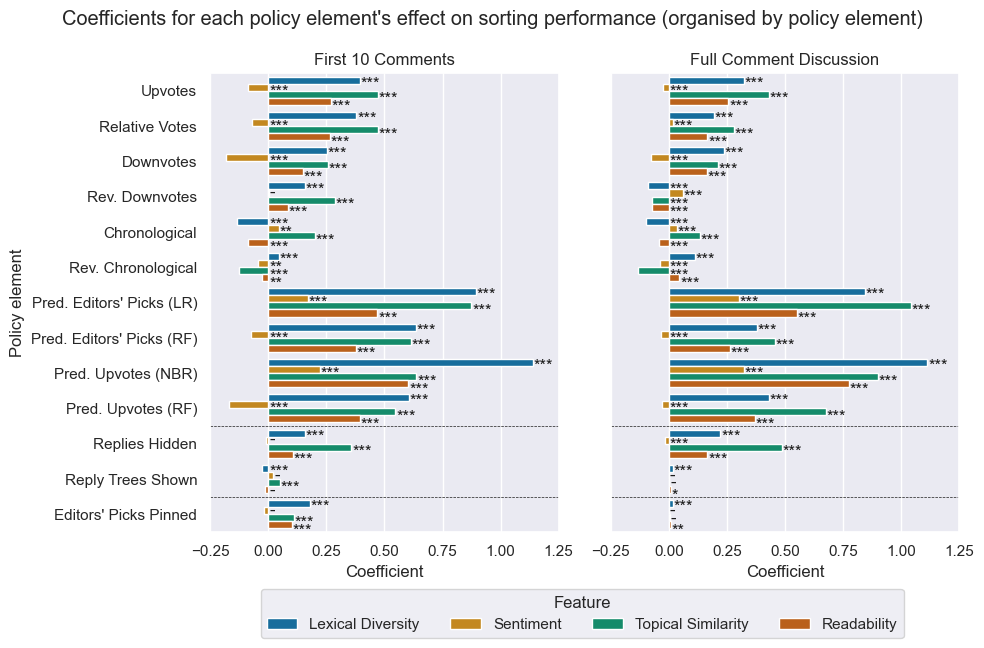

In [5]:
# Plot coefficients by policy element

fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
shift = 0.015
for n, (ncomments, pdictn) in enumerate(pdictr.items()):
    ax = axs[n]
    pdf = pdictn['coef']
    pdf = pdf[(pdf['index']!='(Intercept)')&(~pdf['index'].str.contains(':'))]
    pdf = pdf.set_index('index').loc[polorder].reset_index()
    pvdf = pdictn['pv']
    pvdf = pvdf[(pvdf['index']!='(Intercept)')&(~pvdf['index'].str.contains(':'))]
    pvdf = pvdf.set_index('index').loc[polorder].reset_index()
    sns.barplot(data=pdf, x='value', y='index', hue='variable',
                palette=sns.color_palette("colorblind"), hue_order=featorder,
                ax=axs[n])
    ax.axhline(9.5, c='k', lw=0.5, ls = '--')
    ax.axhline(11.5, c='k', lw=0.5, ls = '--')

    ax.set_xlabel('Coefficient')
    ax.set_xlim(-0.25, 1.25)
    ax.set_title(titles[ncomments])

    colors = [handle.patches[0].get_fc()
                for handle in ax.get_legend_handles_labels()[0]]

    if n:
        ax.axes.get_yaxis().get_label().set_visible(False)
    else:
        ax.set_ylabel('Policy element')
    ax.get_legend().remove()

    #  add text from pvdf to corresponding bars
    for i, row in pvdf.iterrows():
        if row['valuet'] != '-':
            va = 'bottom'
            yp = pos_dict1[row['index']] + shift + (pos_dict2[row['variable']])/4.5
        else:
            va = 'bottom'
            yp = pos_dict1[row['index']] + shift - 0.15 + (pos_dict2[row['variable']])/4.5
        lr = max(pdf[(pdf['index'] == row['index'])&(pdf['variable'] == row['variable'])]['value'].values[0], 0)
        ax.text(lr+off, yp, row['valuet'], ha='left', va=va, color='k')
handles = ax.get_legend_handles_labels()[0]
labels = ax.get_legend_handles_labels()[1]
fig.legend(handles, labels, title='Feature', loc='lower center', bbox_to_anchor=(0.59, -0.08), ncols=4)
fig.suptitle('Coefficients for each policy element\'s effect on sorting performance (organised by policy element)')
fig.tight_layout()
# plt.savefig('figs/coef_by_policy.pdf', bbox_inches='tight')
plt.show()

/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_13566/3893869613.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['policy'] = pdf['index'].str.split(':').str[0].map(polnames)
/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_13566/3893869613.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['interaction'] = pdf['index'].str.split(':').str[1].map(polnames)
/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_13566/3893869613.py:21: SettingWithCopyWarning: 
A value is 

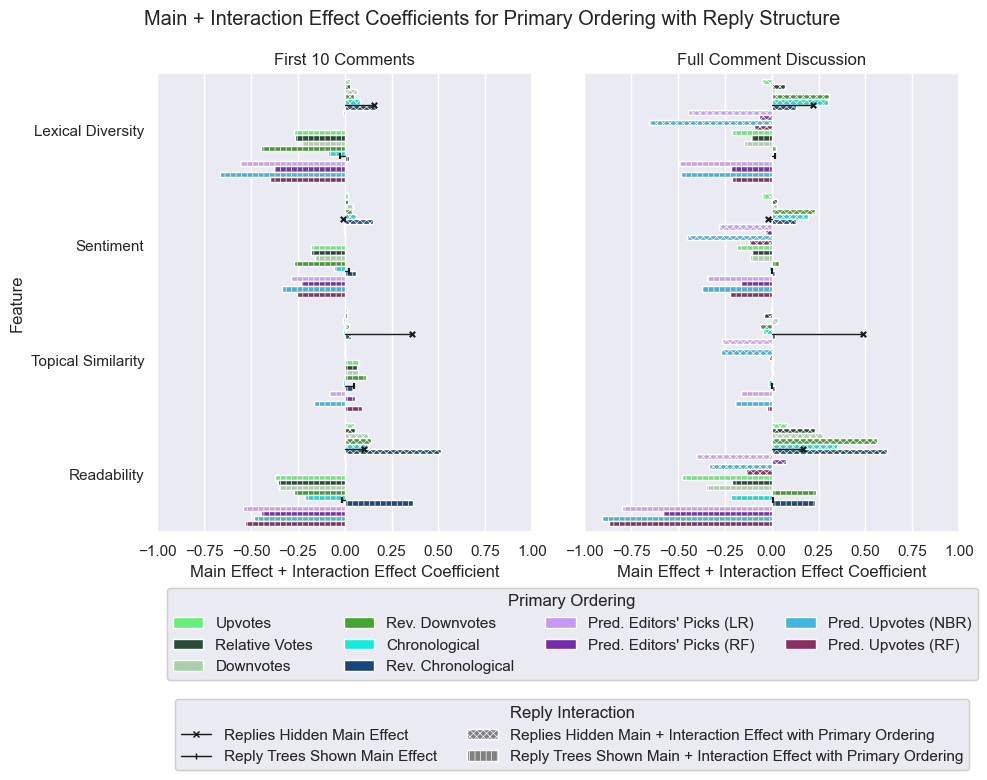

In [6]:
# Plot interaction effects

barsdict = {}
shift = 0.35
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
for n, (ncomments, pdictn) in enumerate(pdictr.items()):
    ax = axs[n]
    pdf = pdictn['coef']
    pdfm = pdf[(pdf['index']!='(Intercept)')&(~pdf['index'].str.contains(':'))]
    pdf = pdf[(pdf['index']!='(Intercept)')&(pdf['index'].str.contains(':'))]
    pdf['policy'] = pdf['index'].str.split(':').str[0].map(polnames)
    pdf['interaction'] = pdf['index'].str.split(':').str[1].map(polnames)
    pdf = pdf.set_index(['policy', 'interaction']).loc[prodorder].reset_index()
    pn = pdictn['coef'].rename(columns={'index': 'policy'})
    pnn = (pn[pn['policy'].isin(polorder[-3:])].rename(
        columns={'policy': 'interaction'}).set_index(['interaction', 'variable'])['value']
        + pdf.set_index(['policy', 'interaction', 'variable'])['value']).reset_index()

    pvdf = pdictn['pv']
    pvdf = pvdf[(pvdf['index']!='(Intercept)')&(pvdf['index'].str.contains(':'))]
    pvdf['policy'] = pvdf['index'].str.split(':').str[0].map(polnames)
    pvdf['interaction'] = pvdf['index'].str.split(':').str[1].map(polnames)
    pvdf = pvdf.set_index(['policy', 'interaction']).loc[prodorder].reset_index()
    
    hatchdict = {0: 'XXXXX', 1: '|||'}
    for n_i, i in enumerate(['Replies Hidden', 'Reply Trees Shown']):
        figt, axt = plt.subplots(1, 1, figsize=(10, 10))
        pnni = pnn[pnn['interaction'] == i]
        sns.barplot(data=pnni, x='value', y='variable', hue='policy', palette=pal,
                    hue_order=polorder[:-3], hatch=hatchdict[n_i], width=0.9, ax=axt)

        axt.get_legend().remove()
        barsdict[i] = [mpatches.Rectangle((bar.get_x(), bar.get_y() + math.floor(nbar/10) + n_i*0.9 - 0.45), bar.get_width(), bar.get_height(), 
                                        fc=bar.get_facecolor(), hatch=bar.get_hatch())
                                        for nbar, bar in enumerate(sorted(sum([axt.get_children().copy()[8*n:8*n+4] for n in range(10)], []), key = lambda x: x.get_y()))]

        plt.close()

    # fig, ax = plt.subplots(1, 1, figsize=(10, 15))
    for k, v in barsdict.items():
        for bar in v:
            ax.add_patch(bar)    

    ax.set_xticks(np.arange(-1.5, 1.5, 0.25))
    # set yticklabels
    ax.set_yticks(range(0,8,2), labels=featorder)
    # remove y gridlines
    ax.yaxis.grid(False)


    for f in featorder:
        for r in ['Replies Hidden', 'Reply Trees Shown']:
            main = pn[(pn['policy'] == r)&(pn['variable'] == f)]['value'].iloc[0]
            yy = 2*featorder.index(f) + 0.9*(r == 'Reply Trees Shown') - 0.45
            ax.plot((0, main), (yy, yy),
                    color='k', lw=1, alpha=1)
            if r=='Replies Hidden':
                marker = 'x'
            else:
                marker = '|'
            ax.scatter((main,), (yy,),
                    color='k', alpha=1, s=15, marker=marker)

    ax.set_xlim(-1, 1)
    ax.set_ylim(7, -1)
    ax.set_xlabel('Main Effect + Interaction Effect Coefficient')
    ax.set_title(titles[ncomments])

# create colour legend
handles = [mpatches.Patch(facecolor=pal[i]) for i in range(12)]
labels = polorder[:-3]
l1 = fig.legend(handles, labels, title='Primary Ordering', loc='lower center', ncols=4,
                bbox_to_anchor=(0.58, -0.15))

# add hatch legend
handles = [mlines.Line2D([], [], color='k', marker='x', ms=5, lw=1),
            mlines.Line2D([], [], color='k', marker='|', ms=5, lw=1)] + [mpatches.Patch(facecolor='grey', hatch=hatchdict[i]) for i in range(2)]
labels = ['Replies Hidden Main Effect', 'Reply Trees Shown Main Effect',
          'Replies Hidden Main + Interaction Effect with Primary Ordering',
          'Reply Trees Shown Main + Interaction Effect with Primary Ordering']
l2 = fig.legend(handles, labels, title='Reply Interaction',  ncols=2, loc='lower center',
                bbox_to_anchor=(0.58, -0.3))

# add both legends to the same axes
ax.add_artist(l1)
ax.add_artist(l2)
axs[0].set_ylabel('Feature')

fig.suptitle('Main + Interaction Effect Coefficients for Primary Ordering with Reply Structure')
fig.tight_layout()
# plt.savefig('figs/reply_int_coef.pdf', bbox_inches='tight')
fig.show()